current_cost=5.000000
current_cost=4.779325
current_cost=4.592031
current_cost=4.431244
current_cost=4.291732
current_cost=4.169604
current_cost=4.061920
current_cost=3.966399
current_cost=3.881228
current_cost=3.804942


<ipython-input-5-c4f457f01fff>:12: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  dataset = np.array([


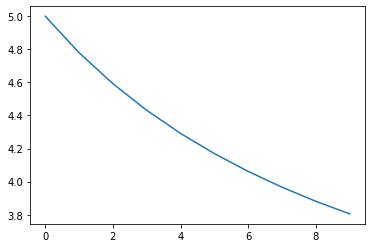

In [5]:
#!/usr/bin/env python

# encoding: utf-8


import matplotlib.pyplot as plt
import numpy as np
import math

#用0,1去做分類

dataset = np.array([
((1, -0.4, 0.3), 0),
((1, -0.3, -0.1), 0),
((1, -0.2, 0.4), 0),
((1, -0.1, 0.1), 0),
((1, 0.6, -0.5), 0), #非線性分割點

((1, 0.8, 0.7), 1),
((1, 0.9, -0.5), 1),
((1, 0.7, -0.9), 1),
((1, 0.8, 0.2), 1),
((1, 0.4, -0.6), 1)])

#計算機率函數

def sigmoid(z):
    return 1 / (1 + np.exp(-z))
    
#計算平均梯度

def gradient(dataset, w):
    g = np.zeros(len(w))
    for x,y in dataset:
        x = np.array(x)
        error = sigmoid(w.T.dot(x))
        g += (error - y) * x
    return g / len(dataset)

#計算現在的權重的錯誤有多少

def cost(dataset, w):
    total_cost = 0
    for x,y in dataset:
        x = np.array(x)
        error = sigmoid(w.T.dot(x))
        total_cost += abs(y - error)
    return total_cost

def logistic(dataset): #演算法實作

    w = np.zeros(3) #用0 + 0*x1 + 0*x2當作初始設定 

    limit = 10 #更新十次後停下

    eta = 1 #更新幅度

    costs = [] #紀錄每次更新權重後新的cost是多少

    for i in range(limit):
        current_cost = cost(dataset, w)
        print ("current_cost=%f" % current_cost)
        costs.append(current_cost)
        w = w - eta * gradient(dataset, w)
        eta *= 0.95 #更新幅度，逐步遞減

    #畫出cost的變化曲線，他應該要是不斷遞減 才是正確

    plt.plot(range(limit), costs)
    plt.show()
    return w
#執行


w = logistic(dataset)
#畫圖


# ps = [v[0] for v in dataset]
# fig = plt.figure()
# ax1 = fig.add_subplot(111)

# ax1.scatter([v[1] for v in ps[:5]], [v[2] for v in ps[:5]], s=10, c='b', marker="o", label='O')
# ax1.scatter([v[1] for v in ps[5:]], [v[2] for v in ps[5:]], s=10, c='r', marker="x", label='X')
# l = np.linspace(-2,2)
# a,b = -w[1]/w[2], -w[0]/w[2]
# ax1.plot(l, a*l + b, 'b-')
# plt.legend(loc='upper left');
# plt.show()